In [2]:
import os
import glob
import pandas as pd
import re
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

path = './metrics_datasets/'
extension = 'csv'
os.chdir(path)
predictions_dataset = glob.glob('*.{}'.format(extension))

## Diccionatio de Dataframes:
* dataframes[Video][Método]
* dataframe[Video]['comparative'][Método]

- Video: nombre del video. Los nombres están almacenados en la variable "videos"
- Método: nombre del método rPPG utilizado en el video. ['cupyCHROM','cupyPOS','extraction_GT','torchCHROM']
- 'comparativa': muestra un diccionario de dataframes ['cupyCHROM','cupyPOS','torchCHROM'] unidos al dataframe 'extraction_GT'

In [4]:
df_by_name = {}
df_by_method = {}
df_by_activity = {}

mae_by_name = {}
mae_by_method = {}
mae_by_method_act = {}
all_gtruth = {}
all_predicted = {}
all_gtruth_act = {}
all_predicted_act = {}
global_mae_by_method = {}


videos = []

# get main dataframe
for file in predictions_dataset:
    str = re.split('\(|\)', file)
    name_and_action = str[0]
    method = str[1]
    #print('method: '+ method)

    if name_and_action not in df_by_name:
        videos.append(name_and_action)
        methodes = {}
        df_by_name[name_and_action] = methodes

    methodes[method] = pd.read_csv(file)
    print(name_and_action, method)

# get dataframe with ground trueth comparatives by name
for name in df_by_name:
    comparatives = {}
    df_by_name[name]['comparatives'] = comparatives
    
    for method in df_by_name[name]:
        if method == 'extraction_GT' or method == 'comparatives':
            continue

        pred = df_by_name[name][method].set_index('time')
        gt = df_by_name[name]['extraction_GT'].set_index('time gt')

        comparatives[method]= gt.join(pred)

# get dictionary with MAE by name
for video in videos:
    df_dict = df_by_name[video]['comparatives']
    methodes = list(df_dict.keys())
    mae_for_method = {}
    for method in methodes:
        df = df_dict[method]    
        gtruth = df.dropna()['BPM gt'].to_numpy()
        predicted = df.dropna()['BPM predicted'].to_numpy()
        mae_for_method[method] = mean_absolute_error(gtruth, predicted)
    
    mae_by_name[video] = mae_for_method

# get global dictionary with MAE by method

for video in videos:
    df = df_by_name[video]['comparatives']
    methodes_in_video = list(df_dict.keys())
    for method in methodes_in_video:
        
        if method not in mae_by_method:
            mae_by_method[method] = {video : {}}
            all_gtruth[method] = []
            all_predicted[method] = []
            global_mae_by_method[method] = []
            
        gtruth = df[method].dropna()['BPM gt'].to_numpy()
        predicted = df[method].dropna()['BPM predicted'].to_numpy()
        for data_i in range(len(gtruth)):
            all_gtruth[method].append(gtruth[data_i])
            all_predicted[method].append(predicted[data_i])
        
        mae = mean_absolute_error(gtruth, predicted)
        mae_by_method[method][video] = mae
        
for method in global_mae_by_method:
    mae_global = mean_absolute_error(all_gtruth[method], all_predicted[method])
    global_mae_by_method[method] = mae_global


#get global MAE for all videos, by activity
for video in videos:
    df = df_by_name[video]['comparatives']
    methodes_in_video = list(df_dict.keys())
    act = video.split('_')[1]
    for method in methodes_in_video:

        if method not in mae_by_method_act:
            mae_by_method_act[method] =  {}

        if act not in mae_by_method_act[method]:
            mae_by_method_act[method][act] = 0

        if method not in all_gtruth_act:
            all_gtruth_act[method] = {}
            all_predicted_act[method] = {}

        if act not in all_gtruth_act[method]:
            all_gtruth_act[method][act] = []
            all_predicted_act[method][act] = []


        gtruth = df[method].dropna()['BPM gt'].to_numpy()
        predicted = df[method].dropna()['BPM predicted'].to_numpy()

        for data_i in range(len(gtruth)):
            all_gtruth_act[method][act].append(gtruth[data_i])
            all_predicted_act[method][act].append(predicted[data_i])

#print(all_gtruth_act.keys())
#print(all_gtruth_act['cupyCHROM'].keys())
#print(all_gtruth_act['cupyPOS'].keys())
#print(all_gtruth_act['torchCHROM'].keys())


for method in mae_by_method_act:
    
    for act in mae_by_method_act[method]:
        mae_global = mean_absolute_error(all_gtruth_act[method][act], all_predicted_act[method][act])
        mae_by_method_act[method][act] = mae_global




alex_gym cupyCHROM
alex_gym cupyPOS
alex_gym extraction_GT
alex_gym torchCHROM
alex_resting cupyCHROM
alex_resting cupyPOS
alex_resting extraction_GT
alex_resting torchCHROM
alex_rotation cupyCHROM
alex_rotation cupyPOS
alex_rotation extraction_GT
alex_rotation torchCHROM
alex_talk cupyCHROM
alex_talk cupyPOS
alex_talk extraction_GT
alex_talk torchCHROM
angelo_resting cupyCHROM
angelo_resting cupyPOS
angelo_resting extraction_GT
angelo_resting torchCHROM
angelo_rotation cupyCHROM
angelo_rotation cupyPOS
angelo_rotation extraction_GT
angelo_rotation torchCHROM
angelo_talk cupyCHROM
angelo_talk cupyPOS
angelo_talk extraction_GT
angelo_talk torchCHROM
cpi_gym cupyCHROM
cpi_gym cupyPOS
cpi_gym extraction_GT
cpi_gym torchCHROM
cpi_resting cupyCHROM
cpi_resting cupyPOS
cpi_resting extraction_GT
cpi_resting torchCHROM
cpi_rotation cupyCHROM
cpi_rotation cupyPOS
cpi_rotation extraction_GT
cpi_rotation torchCHROM
cpi_talk cupyCHROM
cpi_talk cupyPOS
cpi_talk extraction_GT
cpi_talk torchCHROM
dav

In [2]:
df_by_name['alex_gym']['cupyPOS']

,time,BPM predicted,uncert,rPPG method
0,3.0,62.988281,0.0,cupy_CHROM
1,4.0,85.693359,0.0,cupy_CHROM
2,5.0,82.763672,0.0,cupy_CHROM
3,6.0,48.339844,0.0,cupy_CHROM
4,7.0,46.875000,0.0,cupy_CHROM
...,...,...,...,...
387,390.0,54.199219,0.0,cupy_CHROM
388,391.0,54.931641,0.0,cupy_CHROM
389,392.0,194.091797,0.0,cupy_CHROM
390,393.0,75.439453,0.0,cupy_CHROM


In [178]:
def plot_mae(mae_list): ## mae_list: dictionary with methodes and mae for ONE video
    k = list(mae_list.keys())
    v = []
    for key in mae_list:
        v.append(mae_list[key])
    
    plt.plot(k,v)
    plt.show()

def plot_all_maes(mae_by_name): ## mae_list: dictionary with methodes and mae for ALL video
    for video in mae_by_name:
        k = list(mae_dict[video].keys())
        v = []
        for method in k:
            v.append(mae_by_name[video][method])
        plt.plot(k,v, label=video)
    plt.legend(loc='upper right')
    plt.show()
    

def plot_by_activity(mae_by_name, methodes_list = ['cupyCHROM', 'cupyPOS', 'torchCHROM']):
    ## x: actividad
    ## y: MAE
    ## color de línea por cada individuo
    videos = list(mae_by_name.keys()) 
    mae_by_act = {}
    methodes_by_video = {}
    for video in videos:
        temp = video.split('_')
        name, act = temp
        if act not in mae_by_act:
            mae_by_act[act] = []   
        mae_by_act[act].append(video)
        methodes_by_video[video] = list(mae_by_name[video].keys()) ## para iterar por cada método de video

    for met in methodes_list:
        for act in mae_by_act:
            #x = list(mae_by_act.keys())
            y = []                
            x = []
                
            for video in range(len(mae_by_act[act])):
                if met in methodes_by_video[mae_by_act[act][video]]:
                    y.append(mae_by_name[mae_by_act[act][video]][met])
                    x.append(act)
                plt.scatter(x, y)
                    
        plt.title(met)
        plt.show()

def subplot_by_activity(mae_by_name, 
    activity_list = ['gym', 'resting', 'rotation', 'talk'], 
    methodes_list = ['cupyCHROM', 'cupyPOS', 'torchCHROM']):
    if len(methodes_list) <= 1:
        print("methodes list must have at least two elements...")
        return 0
    ## x: actividad
    ## y: MAE
    ## color por cada individuo
    videos = list(mae_by_name.keys()) 

    fig, axs = plt.subplots(1, len(methodes_list), figsize=(15, 5))

    for met in methodes_list:
        for act in activity_list:
            for video in videos:
                temp = video.split('_')
                v_name, v_act = temp
                if v_act == act:
                    x = act
                    y = mae_by_name[video][met]
                    axs[methodes_list.index(met)].scatter(x,y)
                    axs[methodes_list.index(met)].title.set_text(met)

    plt.show()

#def subplot_method_act_vs_globalmae:

def plot_global_mae(global_mae):
    method_color = {
        'cupyCHROM': 'o:r', 
        'cupyPOS': 'o:g', 
        'torchCHROM': 'o:b'
        }
    for method in mae_by_method_act:
        x = []
        y = []
        for act in mae_by_method_act[method]:
            mae_by_method_act[method][act]
            x.append(act)
            y.append(mae_by_method_act[method][act])
        plt.plot(x,y ,method_color[method], label=method)
    plt.grid()
    plt.legend()
    plt.show()


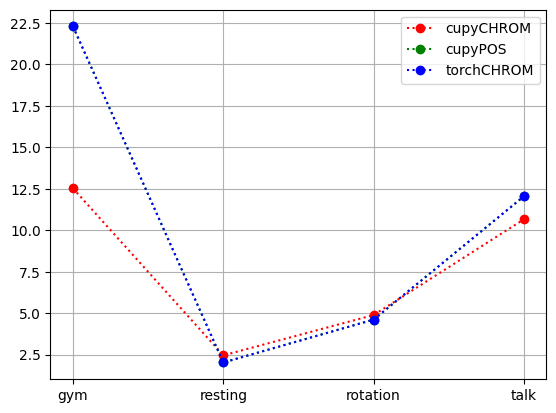

In [179]:
plot_global_mae(mae_by_method_act)

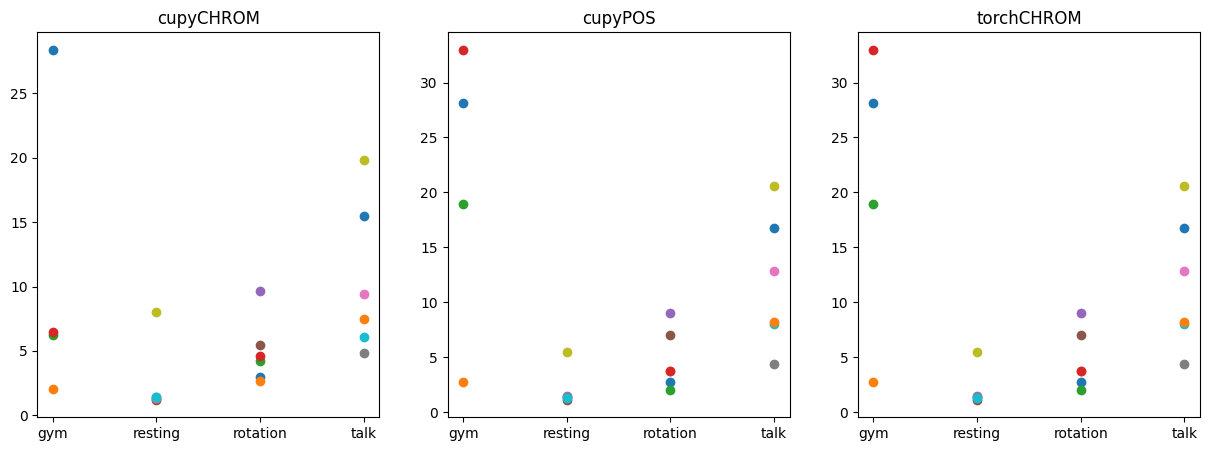

In [26]:
subplot_by_activity(mae_by_name)

|modelo|actividad|mae global|
|cupyPOS|gym|33|
|cupyPOS|rest|33|
|cupyPOS|rotation|33|
|cupyPOS|talk|33|
|torchCHROM|gym|33|
|torchCHROM|rest|33|
|torchCHROM|rotation|33|
|torchCHROM|talk|33|

In [3]:
df_by_name = {}
df_by_method = {}
df_by_activity = {}

mae_by_name = {}
mae_by_method = {}
mae_by_method_act = {}
all_gtruth = {}
all_predicted = {}
all_gtruth_act = {}
all_predicted_act = {}
global_mae_by_method = {}


videos = []

# get main dataframe
for file in predictions_dataset:
    str = re.split('\(|\)', file)
    name_and_action = str[0]
    method = str[1]
    #print('method: '+ method)

    if name_and_action not in df_by_name:
        videos.append(name_and_action)
        methodes = {}
        df_by_name[name_and_action] = methodes

    methodes[method] = pd.read_csv(file)

# get dataframe with ground trueth comparatives by name
for name in df_by_name:
    comparatives = {}
    df_by_name[name]['comparatives'] = comparatives
    
    for method in df_by_name[name]:
        if method == 'extraction_GT' or method == 'comparatives':
            continue

        pred = df_by_name[name][method].set_index('time')
        gt = df_by_name[name]['extraction_GT'].set_index('time gt')

        comparatives[method]= gt.join(pred)

# get dictionary with MAE by name
for video in videos:
    df_dict = df_by_name[video]['comparatives']
    methodes = list(df_dict.keys())
    mae_for_method = {}
    for method in methodes:
        df = df_dict[method]    
        gtruth = df.dropna()['BPM gt'].to_numpy()
        predicted = df.dropna()['BPM predicted'].to_numpy()
        mae_for_method[method] = mean_absolute_error(gtruth, predicted)
    
    mae_by_name[video] = mae_for_method

# get global dictionary with MAE by method

for video in videos:
    df = df_by_name[video]['comparatives']
    methodes_in_video = list(df_dict.keys())
    for method in methodes_in_video:
        
        if method not in mae_by_method:
            mae_by_method[method] = {video : {}}
            all_gtruth[method] = []
            all_predicted[method] = []
            global_mae_by_method[method] = []
            
        gtruth = df[method].dropna()['BPM gt'].to_numpy()
        predicted = df[method].dropna()['BPM predicted'].to_numpy()
        for data_i in range(len(gtruth)):
            all_gtruth[method].append(gtruth[data_i])
            all_predicted[method].append(predicted[data_i])
        
        mae = mean_absolute_error(gtruth, predicted)
        mae_by_method[method][video] = mae
        
for method in global_mae_by_method:
    mae_global = mean_absolute_error(all_gtruth[method], all_predicted[method])
    global_mae_by_method[method] = mae_global


#get global MAE for all videos, by activity
for video in videos:
    df = df_by_name[video]['comparatives']
    methodes_in_video = list(df_dict.keys())
    act = video.split('_')[1]
    for method in methodes_in_video:

        if method not in mae_by_method_act:
            mae_by_method_act[method] =  {}

        if act not in mae_by_method_act[method]:
            mae_by_method_act[method][act] = 0

        if method not in all_gtruth_act:
            all_gtruth_act[method] = {}
            all_predicted_act[method] = {}

        if act not in all_gtruth_act[method]:
            all_gtruth_act[method][act] = []
            all_predicted_act[method][act] = []


        gtruth = df[method].dropna()['BPM gt'].to_numpy()
        predicted = df[method].dropna()['BPM predicted'].to_numpy()

        for data_i in range(len(gtruth)):
            all_gtruth_act[method][act].append(gtruth[data_i])
            all_predicted_act[method][act].append(predicted[data_i])

#print(all_gtruth_act.keys())
#print(all_gtruth_act['cupyCHROM'].keys())
#print(all_gtruth_act['cupyPOS'].keys())
#print(all_gtruth_act['torchCHROM'].keys())


for method in mae_by_method_act:
    
    for act in mae_by_method_act[method]:
        mae_global = mean_absolute_error(all_gtruth_act[method][act], all_predicted_act[method][act])
        mae_by_method_act[method][act] = mae_global


